# Project 3: Poisonous Mushrooms

In this project, we'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. 

We'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. 

Next, we'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, we'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

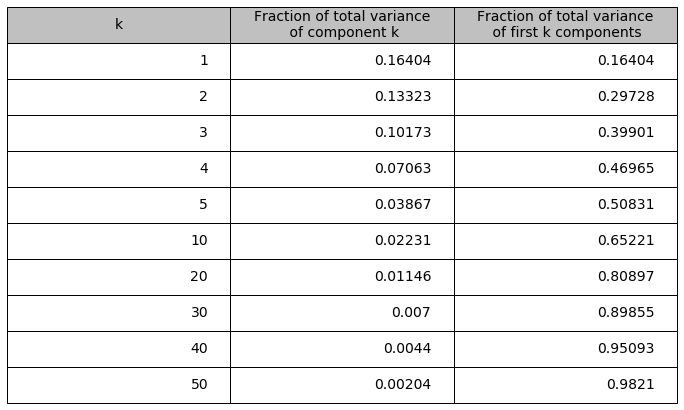

<Figure size 432x288 with 0 Axes>

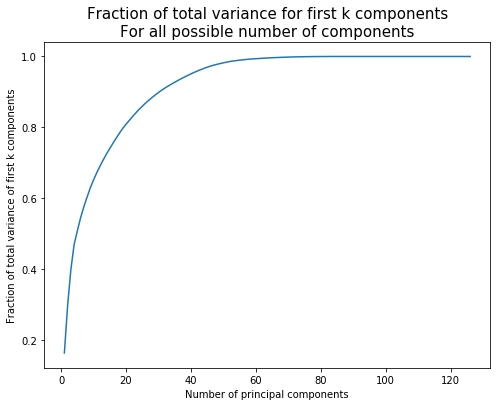

<Figure size 432x288 with 0 Axes>

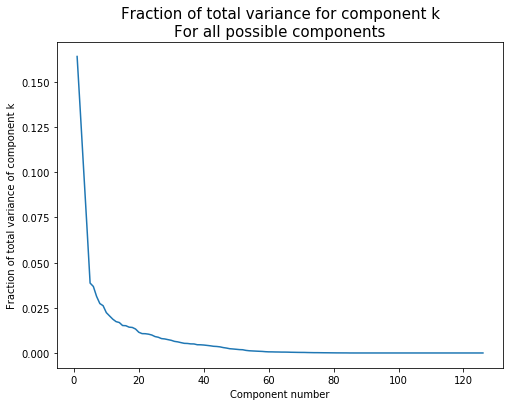

In [5]:
def P1():

### STUDENT START ###

    #Generate a PCA object and fit training data
    pca = PCA()
    pca.fit(train_data)
   
    wanted_k = np.array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50]) - 1
    
    #Get all explained variances as a ratio to total variance
    explained_var = pca.explained_variance_ratio_.round(5)[wanted_k]

    #Generate cumulative sums of explained variances so that the kth is location
    #    is the fraction of variance explained by components 1 through k
    explain_var_sum = np.cumsum(pca.explained_variance_ratio_).round(5)[wanted_k]

    data = list(zip(wanted_k + 1, explained_var, explain_var_sum))
    columns = ['k', 'Fraction of total variance\n of component k', 
               'Fraction of total variance\n of first k components']
    colcolor = ['silver'] * 4
    
    plt.axis('off')
    
    table = plt.table(cellText=data, colLabels=columns, 
                      loc='center', colColours = colcolor)
    table.set_fontsize(20)
    table.scale(2, 3)
    
    plt.show()
    plt.clf()
    
    #Line plot of all variance for first k number of components
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
            np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("Number of principal components")
    plt.ylabel("Fraction of total variance of first k components")
    plt.title("Fraction of total variance for first k components\nFor all possible number of components", fontsize = 15)
    plt.show()
    plt.clf()
    
    #Line plot of all variance for all possible number of components
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_)
    plt.xlabel("Component number")
    plt.ylabel("Fraction of total variance of component k")
    plt.title("Fraction of total variance for component k\nFor all possible components", fontsize = 15)

### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

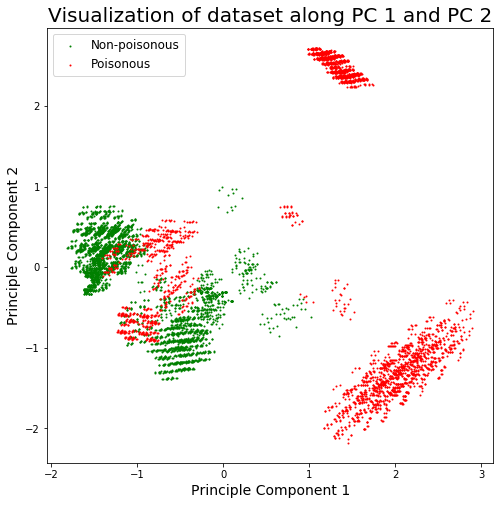

In [6]:
def P2():

### STUDENT START ###

    #Generate PCA object that specifies only keeping 2 components, and fit_transform the data
    #    in order to project it down into 2 dimensions
    pca = PCA(n_components=2)
    train_data_proj2 = pca.fit_transform(train_data)
    
    #Group names (0 is non-poisonous, 1 is poisonous)
    group_names = {0: 'Non-poisonous', 1:'Poisonous'}
    
    #color names (0 is green, and 1 is red)
    color_names = {0: 'green', 1: 'red'}
    
    #Get unique labels, which are just 0 and 1 in this case
    groups = np.unique(train_labels)
    
    #Setup the figure 
    fig = plt.figure(figsize=(8,8))
    
    #For each group (0 or 1), plot a scatter, and generate a label
    for group in groups:
        
        #Get index for which examples below to which group
        idx = np.where(train_labels == group)
        
        #Generate the plot
        plt.scatter(train_data_proj2.T[0][idx], train_data_proj2.T[1][idx], 
                    label = group_names[group], s = 1, c = color_names[group])
        
    #assign some plot labels and generate the legend
    plt.xlabel('Principle Component 1', fontsize = 14)
    plt.ylabel('Principle Component 2', fontsize = 14)
    plt.title("Visualization of dataset along PC 1 and PC 2", fontsize = 20)
    plt.legend(fontsize = 12)
    
### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

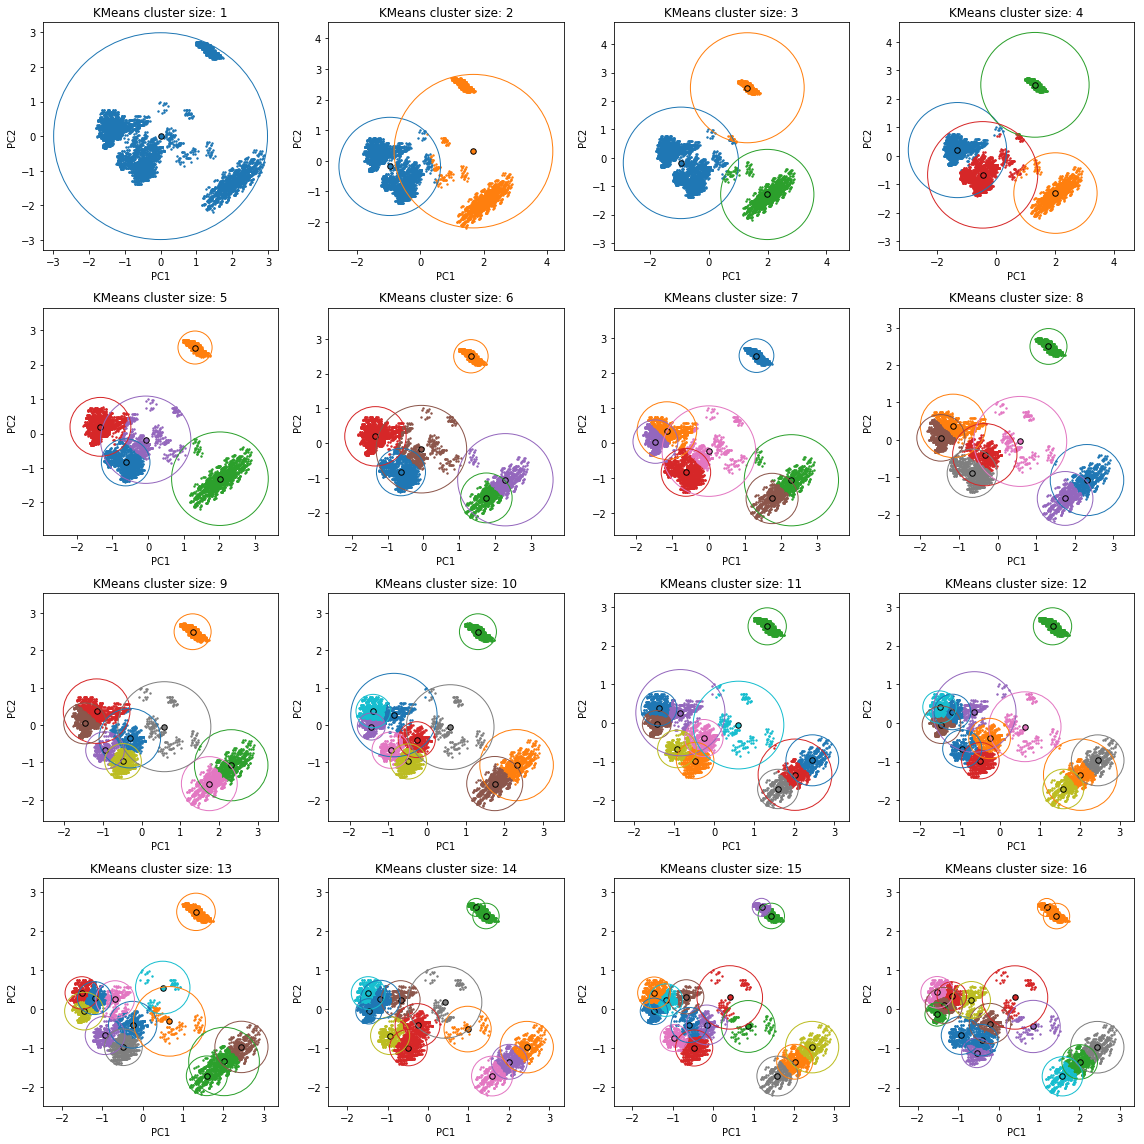

In [7]:
def P3():
    
    ### STUDENT START ###

    #Generate PCA object that specifies only keeping 2 components, and fit_transform the data
    #    in order to project it down into 2 dimensions
    pca = PCA(n_components=2)
    train_data_proj2 = pca.fit_transform(train_data)
    
    def kmeans_routine(nclusters):
        '''
        This function will generate the kmeans cluster centroids
            and return the radii of the circle for plotting
        '''
        
        #Generate kmeans object
        kmeans = KMeans(n_clusters = nclusters, init='k-means++')
        kmeans.fit(train_data_proj2)
        
        #Get the cluster centers, and the labels for each example
        centers = kmeans.cluster_centers_
        labels = kmeans.labels_
        
       
        #Store the max distance of each centroid to the farther away point
        #This will be the radii of the circle to be drawn
        max_dists = np.zeros(centers.shape[0])

        #For each centroid, compute the distance of the point belonging to the cluster
        #    farthest away from the cluster center
        #Cluster centers has shape [#clusters, #features], so we need centers.shape[0]

        for idx_center in range(centers.shape[0]):
            
            #Get the coordinates of the points belonging to this cluster
            labels_in_cluster = train_data_proj2 [labels == idx_center]
            
            #Generate the distance of each point to the cluster center
            #To do this, we use np.linalg.norm, on the vector difference of each data point
            #    with the cluster center. np.linalg.norm will return the Euclidean distance
            #    between these points. Since all cluster centers are the same, the vector difference
            #    will broadcast the center value and subtract it from each data point
            
            #Vector differences
            diffs = labels_in_cluster - centers[idx_center]
            
            #Distances for each point to the center
            #We need axis = 1 to signify that each row 
            #    represents a separate example
            dists = np.linalg.norm(diffs, axis = 1)
            
            #We want the maximum distance, which is the radius of our circle
            dist_max = np.max(dists)
            max_dists[idx_center] = dist_max
            
        return (centers, max_dists, labels)
    ### STUDENT END ###
    
    def plot_routine(ax, centers, max_dists, labels):
        
        '''
        This function takes an Axes object, and plots a scatter plot of the datapoints based on labels
        This also takes centers, and uses distances from centers to plot centroid and circle to encapsulate
            the data points
        '''
        
        #For each cluster, plot the scatters for each point belonging to that cluster
        #Store a list of color values to use for the centroid and circle 
        colors = []
        
        for idx, center in enumerate(centers):
            
            #Get the data belonging to this cluster
            cluster_data = train_data_proj2[labels == idx]
            
            #Generate the scatter plot
            sc = ax.scatter(cluster_data.T[0], cluster_data.T[1], s = 2)
        
            #Get the color corresponding to the scattered points
            color = sc.get_facecolors()[0]
            
            #Mark the centroid
            ax.scatter(*center, s = 30, c = [color], edgecolors = ['black'])
            
            #Generate a circle with the cluster centroid
            #Edge color set to the same color of the scatter
            c = plt.Circle(center, max_dists[idx], ec = color, fill = False)
        
            #add the circle to the plot
            ax.add_patch(c)
            
        #We need to now extend x and y limits in order to capture the entire circle
        ax.autoscale()
            
        #The plot will not be square, which we would like so that the circles are not visually ovals
        #To do this, we will use the min x and y limits for lower bound,
        #    and maximum x and y limits for upper bound, for the values of both axes
            
        lower_lim = np.min([ax.get_xlim()[0], ax.get_ylim()[0]])
        upper_lim = np.max([ax.get_xlim()[1], ax.get_ylim()[1]])
        
        ax.set_xlim((lower_lim, upper_lim))
        ax.set_ylim((lower_lim, upper_lim))
            
        #Set the axes and title
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_title('KMeans cluster size: %d' %len(centers))

    #Generate plot for k = 1 - 16
    fig, ax = plt.subplots(4,4,figsize = (16,16))
    
    #Generate a matrix of 1-16 in order to get the location for Axes
    loc = np.arange(1,17).reshape(4,4)

    for k in range(1,17,1):
        
        #Run kmeans with specified k
        kmeans = kmeans_routine(k)
        
        #Get the x,y location for the subplot corresponding to k
        x,y = np.where(loc == k)
        
        #Add the subplot into the figure
        plot_routine(ax[x[0],y[0]], *kmeans)
    
    plt.tight_layout()
    
P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

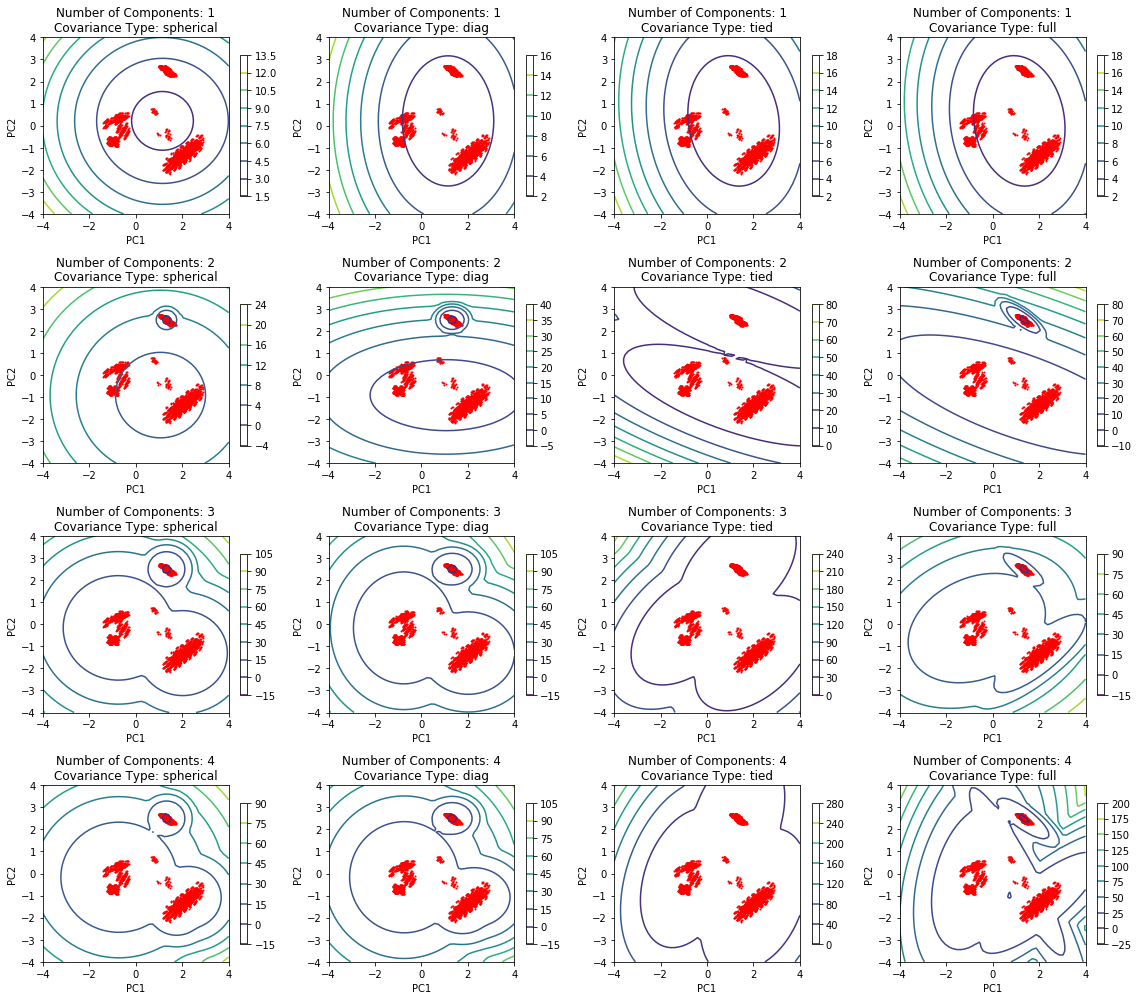

In [8]:
def P4():
    
    ### STUDENT START ###

    #Generate PCA object that specifies only keeping 2 components, and fit_transform the data
    #    in order to project it down into 2 dimensions
    pca = PCA(n_components=2)
    train_data_proj2 = pca.fit_transform(train_data)

    #Extract only the positive examples from the dataset
    train_data_proj2_positive = train_data_proj2 [train_labels == 1]
    
    def gmm_routine(components, cov_type):

        '''
        This function fits a GMM with specified number of components and covariance matrix
        Returns the gmm object
        '''
        gmm = GaussianMixture(n_components=components, covariance_type=cov_type, random_state=12345)
        gmm.fit(train_data_proj2_positive)
        
        return gmm
    
    def contour_values(gmm):
        '''
        This function takes a gmm object, and computes the estimated contours of the model.
        '''
        
        #Generate the range for which contours will be predicted
        #Based on inspection of the data from previous parts, we can plot the contours from 
        #    (-4, 4) on both axes
        
        x = np.linspace(-4, 4)
        y = np.linspace(-4, 4)
        
        #Generate the meshgrid over these x and y values
        #This will generate every pair of x,y values from the
        #    generated linspace values above
        X, Y = np.meshgrid(x, y)
        
        #Generate properly shaped data to predict using the gmm object
        #each point will be represented as a simple data point
        XX = np.array([X.ravel(), Y.ravel()]).T
        
        #Predict the weighted log probability of each point in XX being generated by this particular GMM
        Z = -gmm.score_samples(XX)

        #reshape back to original meshgrid shape (square) for plotting
        Z = Z.reshape(X.shape)
        
        return (X,Y,Z)
    
    def plot_routine(ax, contours, title):
        '''
        This function will take an Axes object, and plot the contours, along with a scatter of 
        the original data points onto that object.  
        '''
        #Plot the contours
        #Set the color bar 
        CS = ax.contour(*contours)
        CB = plt.colorbar(CS, shrink=0.8, extend='both')

        #Generate overlay of scatter plot for the datapoints 
        ax.scatter(*train_data_proj2_positive.T, s = 1, c = 'red')
        
        #plot axes label, and title
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_title(title)
        
    #Components and covariance matrix types to scan over
    components = (1,2,3,4)
    cov_types = ('spherical', 'diag', 'tied', 'full')
    
    #Generate a figure 
    fig = plt.figure(figsize=(16,14))
    
    #Iterate over each # components, covariance types
    n = 1
    for component in components:
        for cov_type in cov_types:
            
            #Fit the gmm model
            gmm = gmm_routine(component, cov_type)
            
            #Generate contours
            contours = contour_values(gmm)
            
            #Plot the contours
            ax = plt.subplot(4,4,n)
            title = "Number of Components: %d" %component + '\n' + "Covariance Type: %s" %cov_type
            
            plot_routine(ax, contours, title)
            
            n+=1
    
    #Make text fit the plots
    plt.tight_layout()
    ### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

In [9]:
def P5():
    
    ### STUDENT START ###

    #Generate PCA object that specifies only keeping 2 components, and fit_transform the data
    #    in order to project it down into 2 dimensions
    pca = PCA(n_components=2)
    train_data_proj2 = pca.fit_transform(train_data)

    #Transform the test set in the same way in order to make predictions
    test_data_proj2 = pca.transform(test_data)
    
    #Positive cases
    train_data_proj2_positive = train_data_proj2 [train_labels == 1]
    
    #Negative cases
    train_data_proj2_negative = train_data_proj2 [train_labels == 0]
    
    #Fit both positive and negative cases with 2 models, both with 4 components and full covariance matrix
    gmm_positive = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_positive.fit(train_data_proj2_positive)

    gmm_negative = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_negative.fit(train_data_proj2_negative)
    
    #Generate the probability that each sample came from each fitted GMM model
    #The larger the prob, the more probable the sample came from the particular model
    positive_prob = gmm_positive.score_samples(test_data_proj2)
    negative_prob = gmm_negative.score_samples(test_data_proj2)

    #Generate a vector of probabilities based on element-wise comparison of negative and positive probabilities
    #If the positive_prob is larger than negative_prob, then the prediction is 1. Otherwise, the prediction is 0.
    
    predictions = np.array(positive_prob > negative_prob, dtype = np.int)
    
    print("Accuracy of the GMM model in test prediction: ", np.round(metrics.accuracy_score(predictions, test_labels), 4))
    ### STUDENT END ###

P5()

Accuracy of the GMM model in test prediction:  0.9502


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

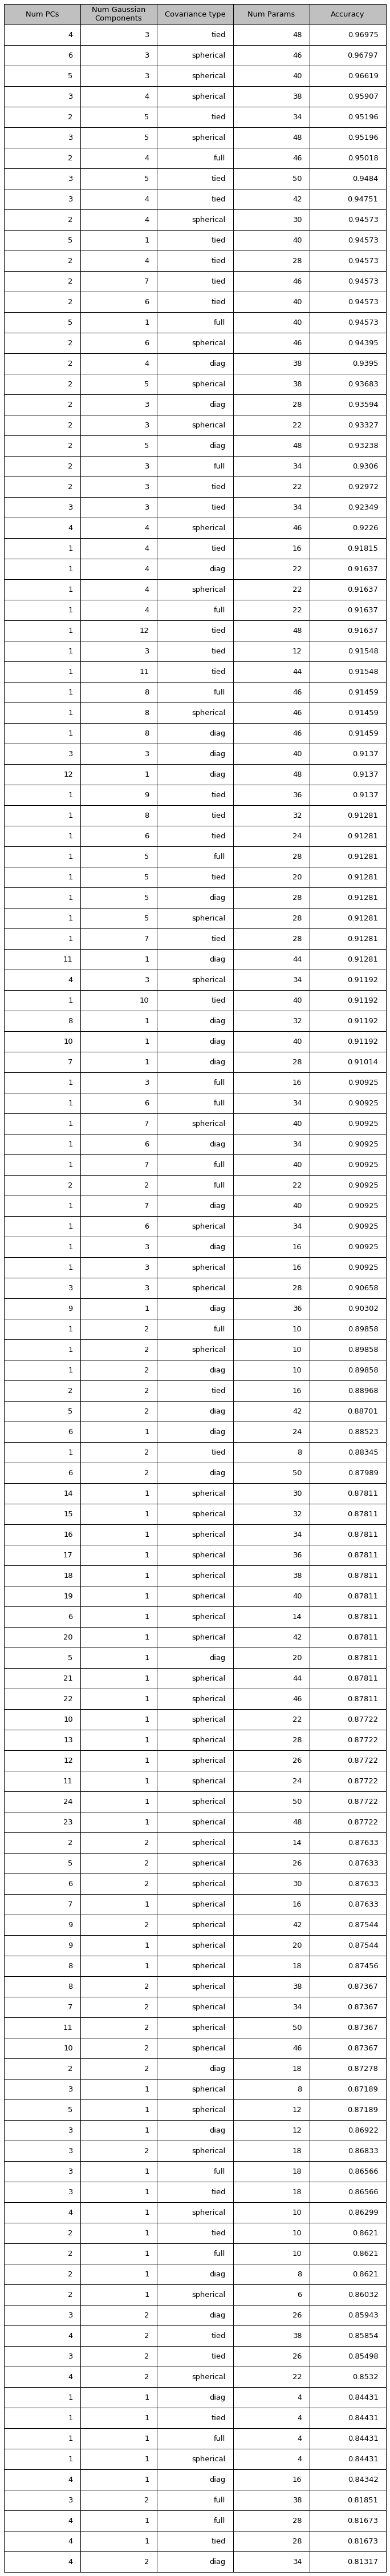

Best condition: 
Num PCs: 4
Num Components: 3
Covariance type: tied
Num parameters: 48
Accuracy: 0.96975


In [10]:
def P6():
    
    ### STUDENT START ###
    
    def num_parameters(num_pcs, n_components, cov_type):
        '''
        This function will determine the number of parameters for each GMM model specification
        Since we have two classes and want to limit the total number of parameters to 50 or less,
            a model for a single class can only have 25 or less parameters
        '''
    
        #The number of "mean" parameters is number of principle components times number of Gaussian components
        #This is true regardless of the covariance type
        mean_parameters = num_pcs * n_components
        
        #The number of variances depends on covariance type
        #If the covariance type is spherical, then each component gets its own variance
        #This means the variance for all features is the same, so we just have n_components 
        if cov_type == 'spherical':
            cov_parameters = n_components
        
        #If the covariance type is diagnal, then each component will get its own covariance matrix
        #This means there will be num_pcs number of variances for each component
        elif cov_type == 'diag':
            cov_parameters = num_pcs * n_components
            
        #If the covariance type is tied, all components have the same covariance matrix
        #This means there will be num_pcs number of variances
        #    and num_pcs * (num_pcs - 1)/2 number of covariances (unique off diagonal elements)
        elif cov_type == 'tied':
            cov_parameters = num_pcs + num_pcs * (num_pcs - 1) / 2
            
        #If the covariance type is full, then each component will get its own covariance matrix
        #Each covariance matrix will have num_pcs number of variances
        #    and num_pcs * (num_pcs - 1)/2 number of covariances (unique off diagonal elements)
        elif cov_type == 'full':
            cov_parameters = (num_pcs + num_pcs * (num_pcs - 1) / 2) * n_components
            
        else:
            raise TypeError("Covariance type not supported by sklearn")
        
        #The number of weights is the number of gmm components - 1
        #This is because there is a weight for each gmm component, but
        #    the sum of all weights = 1, so there's 1 less degree of freedom
        num_weights = n_components - 1
        
        #Return total number of parameters, which is the sum of mean, variance, and weights parameters
        return np.int(mean_parameters + cov_parameters + num_weights)
    
    
    def pca_gmm_routine(num_pcs, n_components, cov_type):
        
        #PCA routine that first fit_transforms on the training data,
        #    then transform the test data in the same way
        pca = PCA(n_components=num_pcs)
        train_data_pca = pca.fit_transform(train_data)
        test_data_pca = pca.transform(test_data)
        
        #Separate the examples based on label
        #Positive cases
        train_data_positive = train_data_pca [train_labels == 1]
    
        #Negative cases
        train_data_negative = train_data_pca [train_labels == 0]

        #gmm routine
        #Fit both positive and negative cases with 2 models, both with specified components and covariance matrix
        gmm_positive = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=12345)
        gmm_positive.fit(train_data_positive)

        gmm_negative = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=12345)
        gmm_negative.fit(train_data_negative)

        #Generate the probability that each sample came from each fitted GMM model
        #The larger the prob, the more probable the sample came from the particular model
        positive_prob = gmm_positive.score_samples(test_data_pca)
        negative_prob = gmm_negative.score_samples(test_data_pca)

        #Generate a vector of probabilities based on element-wise comparison of negative and positive probabilities
        #If the positive_prob is larger than negative_prob, then the prediction is 1. Otherwise, the prediction is 0.
        predictions = np.array(positive_prob > negative_prob, dtype = np.int)

        #return the accuracy
        return np.round(metrics.accuracy_score(predictions, test_labels), 5)

    #We will now derive all possible combinations of parameters by starting with 1 PC, 1 Gaussian component,
    #    and checking all 4 covariance types

    #Have an array to store possible components
    possible_params = []
    
    #Start the search with both parameters at 1
    num_pcs, n_components  = 1, 1
    cov_types = np.array(['spherical', 'diag', 'tied', 'full'])

    #Stopping loop for n_components
    while True:       
            
        #Stopping loop for num_pcs
        while True:
            
            #Calculate number of parameters for all covariance types
            num_params = np.array([num_parameters(num_pcs, n_components, cov_type) for cov_type in cov_types])
            
            #If all values > 25, then we didn't find any possible parameter combinations
            if np.all(num_params > 25):
                break
            
            #Otherwise, we store possible combinations and number of parameters, increase n_components, and continue scanning
            else:
                for i,num_param in enumerate(num_params):
                    if num_param <= 25: 
                        possible_params.append([num_pcs, n_components, cov_types[i], num_param*2])      
            n_components += 1

        #If the first while loop increased the number of components (n_components > 1),
        #    increase the num_pcs and keep scanning
        #    by resetting number of components back to 1
        #If the first while loop did not increase n_components, then that means the current num_pcs
        #    did not generate any possible parameter combinations even with minimum number of components,
        #    so there are no more possible combinations
        
        if n_components > 1:
            num_pcs += 1
            n_components = 1
        else:
            break

    #Print accuracy of each possible model, along with number of parameters
    accuracies = []
    
    for param_set in possible_params:
        acc = pca_gmm_routine(*param_set[:-1])
        accuracies.append(acc)
    
    
    #Plot a table of all possible parameters, sorted by accuracy
    order = np.argsort(accuracies)[::-1]
    possible_params_str = np.array(possible_params)

    data = list(zip(possible_params_str[order].T[0], 
                    possible_params_str[order].T[1],
                    possible_params_str[order].T[2],
                    possible_params_str[order].T[3],
                    np.array(accuracies)[order]))
    columns = ['Num PCs', 'Num Gaussian\nComponents', 
               'Covariance type', 'Num Params', 'Accuracy']
    
    colcolor = ['silver'] * 5
    
    plt.axis('off')
    
    table = plt.table(cellText=data, colLabels=columns, 
                      loc='center', colColours = colcolor)
    table.set_fontsize(20)
    table.scale(2, 3)
    
    plt.show()
    
    #Get the best accuracy
    best_accuracy = np.argmax(accuracies)
    param_set = possible_params[best_accuracy]
    
    print("Best condition: ")
    print('\n'.join(["Num PCs: %d" %param_set[0],
                     "Num Components: %d" %param_set[1],
                     "Covariance type: %s" %param_set[2],
                     "Num parameters: %d" %(param_set[3]),
                     "Accuracy: %0.5f" %accuracies[best_accuracy]]))
    
    ### STUDENT END ###
            
P6()

**Notebook as part of U.C. Berkeley Masters in Information and Data Science, course W207 Applied Machine Learning**